### Libraries

In [2]:
import os
import h5py
import cv2

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

/Users/hyunwoogu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load Data

In [3]:
def load(dbname, dataset):
    '''
    dbname is the path to the database hdf file, dataset is the dataset name.
    returns a pandas dataframe and a dictionary with meta data for the dataset.
    '''
    attrs = None
    with h5py.File(dbname) as f:
        if dataset not in f.keys():
            raise ValueError('Can\'t find dataset. Available keys are: ' + str(f.keys()))
        try:
            df = pd.DataFrame(dict((k, f[dataset][k][:].ravel()) for k in f[dataset].keys()))
        except ValueError:
            raise RuntimeError('Not all fields have the same length:' +
                str(dict((k, f[dataset][k][:].ravel().shape) for k in f[dataset].keys())))
        if len(f[dataset].attrs.keys())>0:
            attrs = dict((k, f[dataset].attrs[k]) for k in  f[dataset].attrs.keys())
    return df, attrs

In [4]:
os.chdir('/Users/hyunwoogu/Dropbox/2018Autumn/GradThesis/EyeTracking_data/')

In [5]:
Data, attrs = load("etdb_v1.0.hdf5", "Face Discrim.")

### Data

In [6]:
Counts = [1] ## Must be more efficient way..
j = 1

for i in np.arange(1, Data.shape[0]) :
    if all(Data.iloc[i-1, [0, 11]] == Data.iloc[i, [0, 11]]) : j += 1
    else : j = 1
    Counts.append(j)

Data['counts'] = Counts

In [7]:
Data.columns.values

array(['SUBJECTINDEX', 'category', 'chain', 'condition', 'dataset_nr',
       'end', 'filenumber', 'fix', 'isref', 'phase', 'start', 'trial',
       'x', 'y', 'counts'], dtype=object)

In [26]:
Data.loc[Data.counts==1,['start', 'end', 'x', 'y', 'counts']]

,start,end,x,y,counts
0,203,391,689.163025,579.031311,1
2,11,161,240.462830,531.738525,1
5,201,330,711.756104,611.483887,1
8,244,369,819.436401,592.599854,1
12,219,345,826.816040,612.281494,1
15,232,458,802.756775,659.950378,1
20,181,324,722.299988,619.823608,1
26,212,441,689.464050,552.405823,1
30,203,440,689.866028,547.213806,1
33,14,152,905.295593,610.701965,1


In [8]:
 % 4

3

In [12]:
Data.counts.value_counts()

1     23144
2     22775
3     21262
4     17378
5     10728
6      4036
7       930
8       147
9        36
10        7
11        2
14        1
13        1
12        1
Name: counts, dtype: int64

In [68]:
Order = Data[Data['filenumber']==Num]

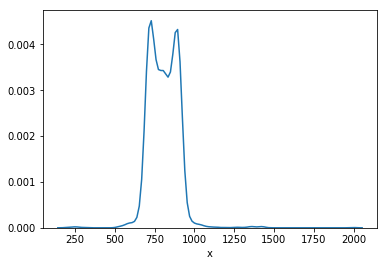

In [69]:
sns.distplot(Subject['x'], hist=False)
plt.show()

In [9]:
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

NameError: name 'Num' is not defined

In [10]:
def transparent_cmap(cmap, N=255):
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

mycmap = transparent_cmap(plt.cm.Reds)

In [12]:
plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)

ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0)

plt.show()

NameError: name 'img' is not defined

#### Gaze map by different faces

pictures used : (21, 5, 1, 17, 29, 13) based on the frequency.

Pic|Freq
-|-
21|    10660
5|     10289
1|     10215
17|    10146
29|     9292
13|     9065

KeyboardInterrupt: 

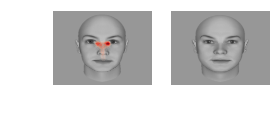

In [13]:
fig = plt.figure()

for i, Num in enumerate((21, 5, 1, 17, 29, 13)):
    
    FileNum = Data[Data['filenumber']==Num]
    adr = '21/' + str(Num) + '.png'
    img = cv2.imread(adr, 1)
    img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)
    
    fig_num = "23" + str(i+1)
    fig.add_subplot(int(fig_num))

    plt.imshow(img)
    plt.xlim(0, 1600)
    plt.ylim(1200, 0)
    plt.axis('off')

    ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
    ax.patch.set_facecolor('white')
    ax.collections[0].set_alpha(0)

plt.show()

#### Gaze map by fixation area

In [32]:
Data.loc[:,'x']//Data.loc[:,'y']

0         1.0
1         1.0
2         0.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
100418    1.0
100419    1.0
100420    1.0
100421    1.0
100422    1.0
100423    1.0
100424    1.0
100425    1.0
100426    1.0
100427    1.0
100428    1.0
100429    1.0
100430    1.0
100431    1.0
100432    1.0
100433    0.0
100434    0.0
100435    1.0
100436    1.0
100437    1.0
100438    1.0
100439    1.0
100440    1.0
100441    1.0
100442    1.0
100443    0.0
100444    1.0
100445    1.0
100446    1.0
100447    1.0
Length: 100448, dtype: float32

In [ ]:
Data.
Data.loc[:,'x']//Data.loc[:,'y']
// 40

In [25]:
Data.loc[:,'x']//Data.loc[:,'y']
// 40

40

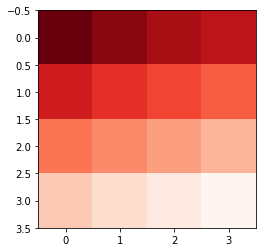

In [46]:
plt.imshow(A, cmap='Reds_r', interpolation='nearest')
plt.show()

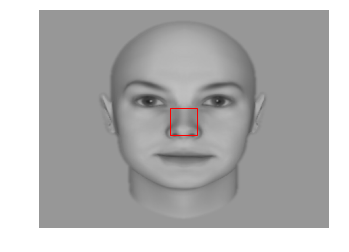

In [17]:
coord = (520, 390) ## x coord (from left), y coord (from top) 
coord = (720, 540)

fig, ax = plt.subplots(1)

plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)
plt.axis('off')

rect = patches.Rectangle(coord,150,150,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

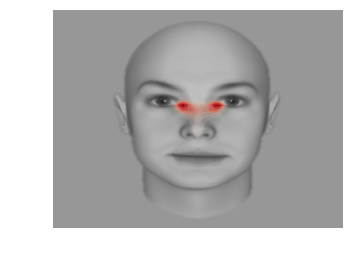

In [14]:
fig = plt.figure()

Num = 1
FileNum = Data[Data['filenumber']==Num]
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)
plt.axis('off')

ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0)

plt.show()

In [10]:
Num = 15
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

In [ ]:
from PIL import Image

im = np.array(Image.open('stinkbug.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

#### Gaze map by fixation order

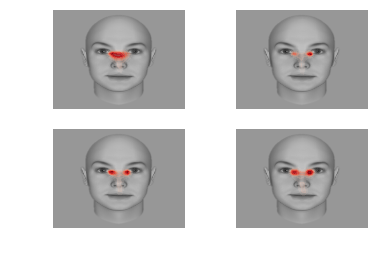

In [125]:
fig = plt.figure()

for i, Order in enumerate((1, 3, 5, 7)):
    
    GazeOrder = Data[Data['counts']==Order]
    adr = '21/1.png'
    img = cv2.imread(adr, 1)
    img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)
    
    fig_num = "22" + str(i+1)
    fig.add_subplot(int(fig_num))

    plt.imshow(img)
    plt.xlim(0, 1600)
    plt.ylim(1200, 0)
    plt.axis('off')

    ax = sns.kdeplot(GazeOrder['x'], GazeOrder['y'], shade = True, cmap = mycmap)
    ax.patch.set_facecolor('white')
    ax.collections[0].set_alpha(0)

plt.show()